**ASSIGNMENT-4(SMS SPAM CLASSIFICATION)**





 **1.Download the Dataset:-**

**2.Import required library**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import keras
from keras.models import Sequential
from tensorflow.keras import layers
import nltk
import string 
import seaborn as sns
import matplotlib.pyplot as plt


**3.Read dataset and do pre-processing**

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
5401,ham,Babes I think I got ur brolly I left it in Eng...
1272,ham,Ok...
1117,spam,"449050000301 You have won a å£2,000 price! To ..."
4849,ham,Maybe you should find something else to do ins...
1504,ham,Oh my God. I'm almost home


In [6]:
df['v1'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Missing value

In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
#checking for duplicate values
df.duplicated().sum()

403

In [9]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

**Text Preprocessing**


In [11]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
 nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [13]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [16]:
def transform_text(v2):
  text = v2.lower()
  text = nltk.word_tokenize(v2)


  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)  

  text = y[:]
  y.clear()
  
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [17]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [18]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
df['transformed_text']=df['v2'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.head()

,v1,v2,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though


In [21]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [23]:
spam_wc = wc.generate(df[df['v1']==1]['transformed_text'].str.cat(sep=" "))

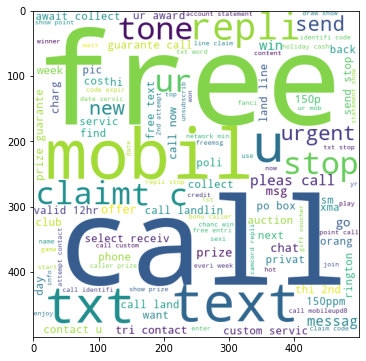

In [24]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [25]:
ham_wc = wc.generate(df[df['v1']==0]['transformed_text'].str.cat(sep=" "))

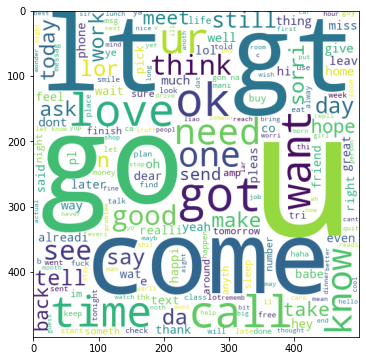

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [27]:
df.head()

,v1,v2,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though


In [28]:
spam_corpus = []
for msg in df[df['v1']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [29]:
len(spam_corpus)

10847

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


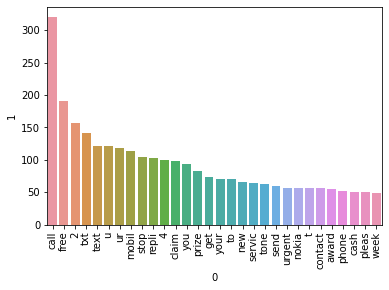

In [30]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
ham_corpus = []
for msg in df[df['v1']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [32]:
len(ham_corpus)

40804

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


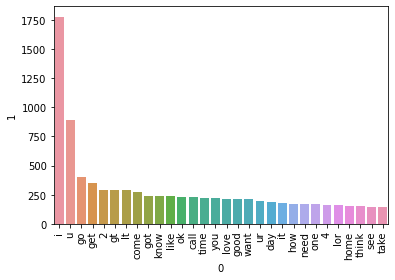

In [33]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
df.head()

,v1,v2,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though


**4.Create Model**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [36]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [37]:
x.shape

(5169, 6826)

In [38]:
y = df['v1'].values

In [39]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
model = keras.Sequential()

**5.Add Layers (LSTM, Dense-(Hidden Layers), Output)**

In [43]:
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 embedding_1 (Embedding)     (None, 10, 64)            64000     
                                                                 
 gru (GRU)                   (None, 10, 256)           247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 10)                1

**6.Compile the Model**

In [45]:

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


**7.Fit the Model**

In [46]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs=5)

Epoch 1/5


130/130 [==============================] - 560s 4s/step - loss: 0.5084 - accuracy: 0.8687 - val_loss: 0.4123 - val_accuracy: 0.8665
Epoch 2/5
130/130 [==============================] - 555s 4s/step - loss: 0.3864 - accuracy: 0.8755 - val_loss: 0.4048 - val_accuracy: 0.8665
Epoch 3/5
130/130 [==============================] - 560s 4s/step - loss: 0.3845 - accuracy: 0.8755 - val_loss: 0.4045 - val_accuracy: 0.8665
Epoch 4/5
130/130 [==============================] - 556s 4s/step - loss: 0.3821 - accuracy: 0.8755 - val_loss: 0.3994 - val_accuracy: 0.8665
Epoch 5/5
130/130 [==============================] - 553s 4s/step - loss: 0.3813 - accuracy: 0.8755 - val_loss: 0.3955 - val_accuracy: 0.8665


**8.Save The Model**

In [47]:
model.save('spam.h5')

**9.Test The Model**

In [48]:
ypred = model.predict(x_test)
ypred

33/33 [==============================] - 115s 3s/step


array([[ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ],
       [ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ],
       [ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ],
       ...,
       [ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ],
       [ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ],
       [ 6.2582316,  4.352255 , -1.7719276, ..., -1.2835315, -1.3624684,
        -1.704372 ]], dtype=float32)

In [49]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
data = "Have a fanstatic day!"
text = model.predict(cv.fit_transform(["data"]).toarray())

1/1 [==============================] - 0s 60ms/step


In [82]:
class_name = ["spam_corpus","ham_corpus"]
pred_id = text.argmax(axis=1)[0]
pred_id
print(str(class_name[pred_id]))

spam_corpus
